# 1.5.09 Feature Matching

<h3>
    <ul>
        <li>We will see how to match features in one image with others</li>
        <li>We will see the Brute-Force matcher and FLANN Matcher in OpenCV</li>
    </ul>
    </h3>


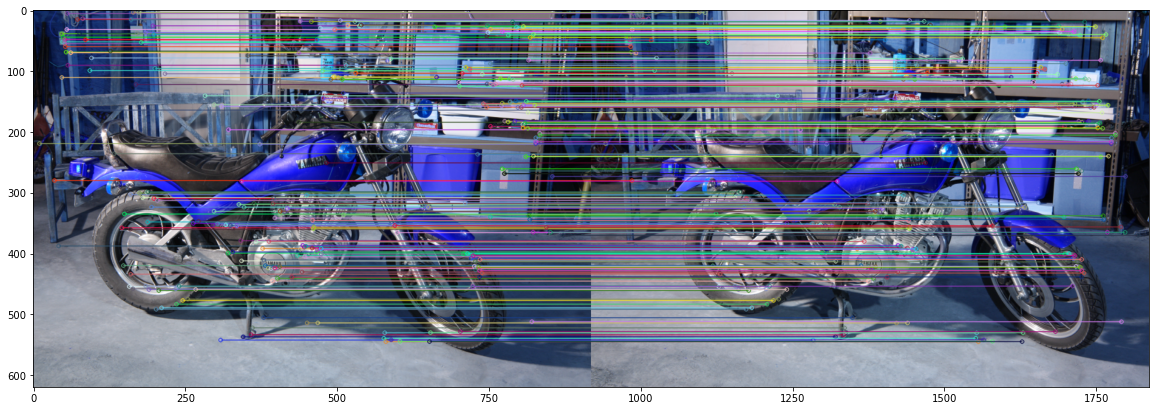

(<matplotlib.image.AxesImage at 0x18a662920a0>, None)

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('bike.png')
img2 = cv2.imread('bike2.png')

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches :
    if m.distance < 0.25*n.distance :
        good.append([m])
        
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)

plt.figure(figsize=(20,20)) 
plt.imshow(img3), plt.show()

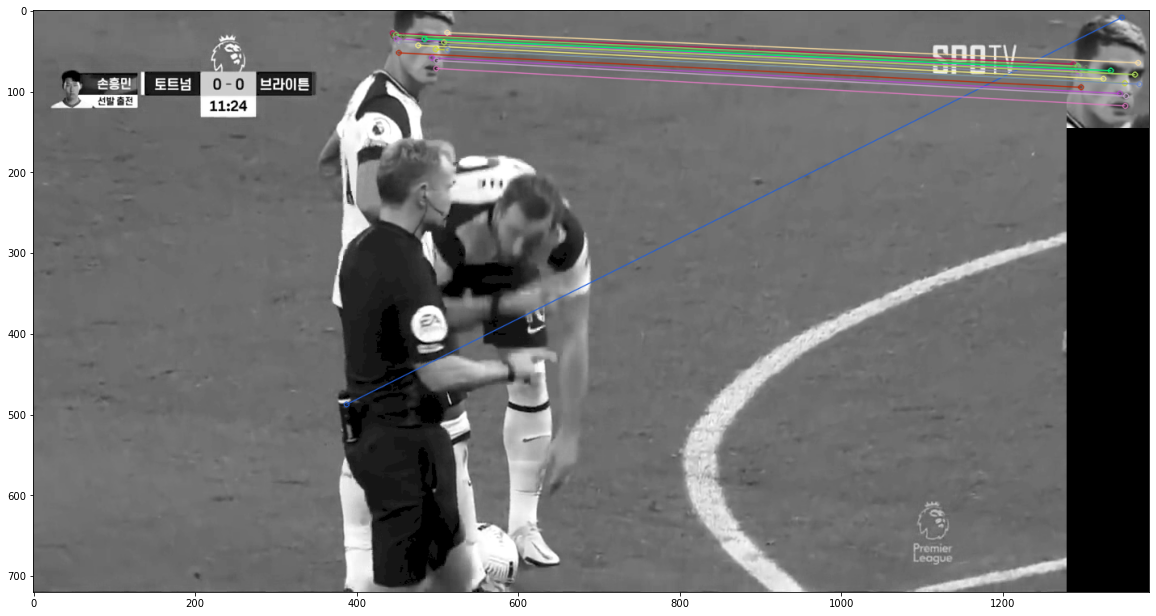

(<matplotlib.image.AxesImage at 0x190cf4daeb0>, None)

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('hmson/hmson3.png', 0)#quryImage
img2 = cv2.imread('hmson/20201105_125557.png', 0)#trainImage

#Initiate SIFT detector
sift = cv2.SIFT_create()

#find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

#BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

#Apply ratio test
good = []
for m, n in matches :
    if m.distance < 0.59*n.distance :
        good.append([m])
        
#cv2.drawMatchesKnn excets list of lists as matches
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)

plt.figure(figsize=(20,20)) 
plt.imshow(img3), plt.show()